# Resumo Teórico: Transformadas Z, DTFT e DFT – Análise Espectral

## **1. A Transformada Z (TZ) e a Região de Convergência (RDC)**

A Transformada Z é uma generalização da Transformada de Fourier em Tempo Discreto (DTFT).  
Ela mapeia uma sequência de tempo discreto \( x[n] \) em uma função complexa na variável \( z \).

### **1.1 Definição da Transformada Z Bilateral**
\[
X(z) = \sum_{n=-\infty}^{\infty} x[n] z^{-n}
\]

onde:
- \( z = r e^{j\omega} \) (variável complexa),
- \( r \) representa o raio,
- \( \omega \) representa a frequência angular.

---

### **1.2 Região de Convergência (RDC)**

A RDC é o conjunto dos valores de \( z \) para os quais a série da Transformada Z converge.

#### **Propriedades fundamentais da RDC:**

- A RDC é geralmente um **anel** no plano-\(z\) centrado na origem.
- A RDC é **determinada pelos polos** da função \(X(z)\).
- **Polos nunca pertencem à RDC** (pois \( |X(z)| \to \infty \) nesses pontos).
- A forma da RDC depende do comportamento da sequência para \(n \to +\infty\) e \(n \to -\infty\).

---

### **1.3 Relação entre Polos, Zeros, Causalidade e Estabilidade**

#### **Polos e Zeros**
Se:
\[
H(z) = \frac{B(z)}{A(z)},
\]
então:
- **Zeros** = raízes do numerador \(B(z)\),
- **Polos** = raízes do denominador \(A(z)\).

#### **Causalidade**
Um sistema LIT causal possui:
- Resposta ao impulso \( h[n] = 0 \) para \( n < 0 \),
- RDC que **se estende para fora** do polo de maior magnitude,
- Pode incluir \( z = \infty \).

> Para causalidade: todos os polos devem estar dentro do **círculo unitário**.

#### **Estabilidade BIBO**
Um sistema é BIBO estável se:
- A RDC **inclui o círculo unitário**, ou seja \( |z| = 1 \).

Para sistemas causais, isso implica:
> Todos os polos devem estar **estritamente dentro do círculo unitário**.

---

# **2. Transformadas de Fourier**

A Transformada de Fourier em Tempo Discreto (DTFT) é um caso especial da Transformada Z, obtida avaliando \( X(z) \) no círculo unitário.

\[
z = e^{j\omega}
\]

---

## **2.1 DTFT – Transformada de Fourier em Tempo Discreto**

\[
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}
\]

### **Características da DTFT**
- A DTFT é uma função **contínua** de frequência.
- É **periódica** com período \( 2\pi \).
- Fornece a **resposta em frequência** de sistemas LIT:
  \[
  H(e^{j\omega})
  \]

### **Limitações**
- Não é adequada para cálculo numérico em sinais longos,
- Depende de avaliação contínua em \( \omega \).

---

## **2.2 DFT – Transformada Discreta de Fourier**

A DFT é uma versão **discreta e computável** da DTFT, obtida ao amostrar a DTFT e restringir o sinal a uma janela finita.

\[
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi kn / N}
\]

### **Características**
- Frequência amostrada em **N pontos discretos**.
- Período também é \(N\) amostras.
- Implementada computacionalmente via **FFT**.

### **Relação com DTFT**
\[
X[k] \approx X(e^{j\omega}) \quad \text{para } \omega = \frac{2\pi k}{N}
\]

---

# **3. Propriedades Comuns das Transformadas**
As transformadas Z, DTFT e DFT compartilham as propriedades fundamentais:

- **Linearidade**
- **Deslocamento no tempo**
- **Escala complexa**
- **Convolução no tempo** ↔ **Multiplicação na frequência**
- **Deslocamento na frequência**

Essas propriedades são cruciais na análise de sinais e sistemas.

---

# **4. Análise Espectral: DFT e FFT**

A DFT (e sua implementação FFT) é amplamente utilizada para a análise do conteúdo espectral de sinais.

---

## **4.1 Resolução Espectral**

A resolução espectral é dada por:
\[
\Delta f = \frac{F_s}{N}
\]

Portanto:
- Aumentar \(N\) → **melhor resolução**,
- Reduzir \(N\) → espectro mais “grosseiro”.

---

## **4.2 Vazamento Espectral (Leakage)**

Ocorre quando o intervalo analisado **não contém um número inteiro de períodos** do sinal.

Consequência:
- A energia do tom se espalha para frequências vizinhas.
- As linhas espectrais ficam “borradas”.

---

## **4.3 Janelamento**

Aplicar uma janela reduz o leakage ao suavizar as bordas do sinal.

### **Janelas mais comuns**
- **Retangular** → maior leakage
- **Hamming** → bom compromisso
- **Blackman** → melhor redução de sidelobes, pior resolução

### **Efeito das Janelas**
- Reduzem leakage,
- Aumentam o **lóbulo principal**,
- Diminuem a resolução espectral.

---

#**Resumo Final**

- A Transformada Z generaliza a DTFT e permite análise de sinais que não convergem na DTFT.  
- A RDC determina a convergência da TZ e se relaciona diretamente à causalidade e estabilidade.  
- A DTFT fornece a descrição contínua da frequência.  
- A DFT é a versão computacional e discreta da DTFT.  
- O janelamento e o tamanho da DFT impactam diretamente o espectro obtido.  


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, find_peaks
import pandas as pd

In [11]:
# ---------------------------------------------------
# 1) Geração do sinal
# ---------------------------------------------------
# x[n] = sin(2π·0.1·n) + 0.5·sin(2π·0.4·n)

f1 = 0.1        # frequência 1 (ciclos/amostra)
f2 = 0.4        # frequência 2 (ciclos/amostra)
A1 = 1.0
A2 = 0.5

Ngen = 1024     # número de amostras geradas inicialmente
n = np.arange(Ngen)

x = A1 * np.sin(2*np.pi*f1*n) + A2 * np.sin(2*np.pi*f2*n)

In [12]:
# ---------------------------------------------------
# 2) Funções para FFT com janelas
# ---------------------------------------------------

window_funcs = {
    'rectangular': np.ones,
    'hamming': windows.hamming,
    'blackman': windows.blackman
}

def compute_fft(x_seg, win, Nfft):
    """
    Aplica janela, FFT e retorna:
    - frequências positivas
    - magnitude em dB
    - fase
    - vetor FFT positivo bruto
    """
    xw = x_seg * win
    X = np.fft.fft(xw, Nfft)
    freqs = np.fft.fftfreq(Nfft, d=1.0)
    half = Nfft // 2

    freqs_pos = freqs[:half]
    X_pos = X[:half]

    mag = 20*np.log10(np.abs(X_pos) + 1e-12)
    phase = np.angle(X_pos)

    return freqs_pos, mag, phase, X_pos


In [13]:
# ---------------------------------------------------
# 3) Testes para diferentes tamanhos N (resolução)
# ---------------------------------------------------

N_list = [64, 128, 512]     # tamanhos de FFT a comparar
results = []                # armazenar resultados dos picos



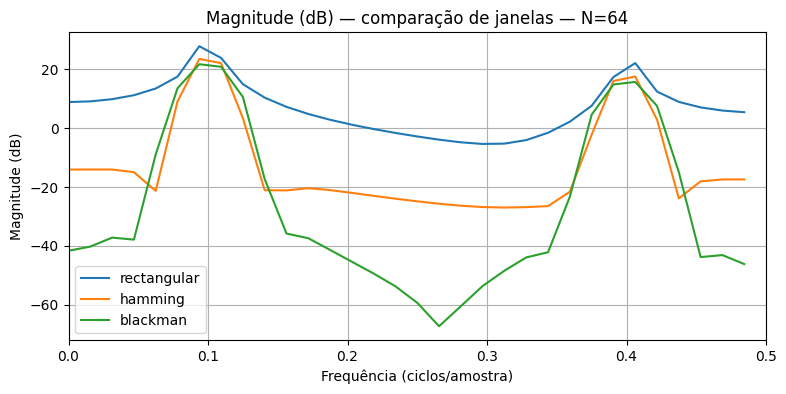

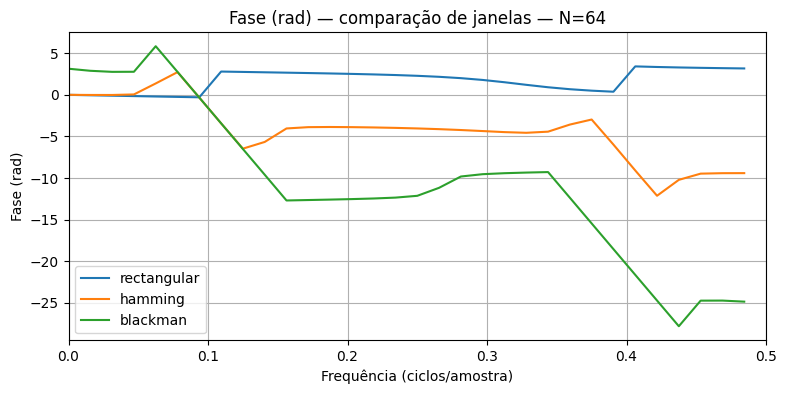

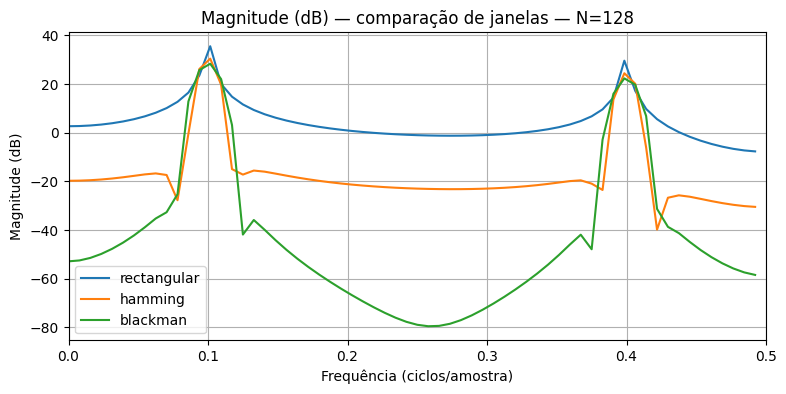

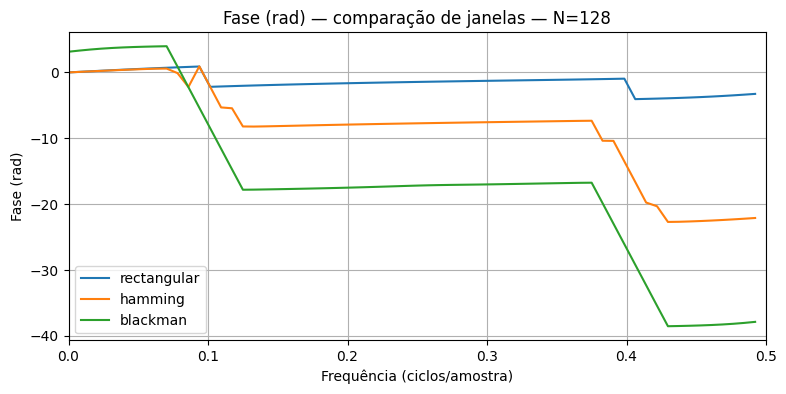

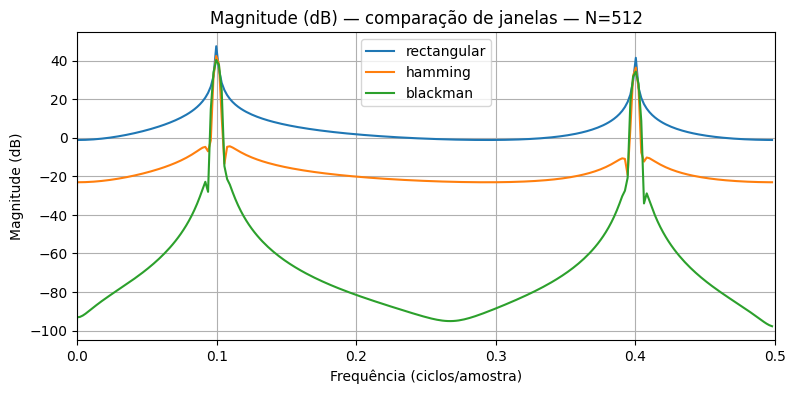

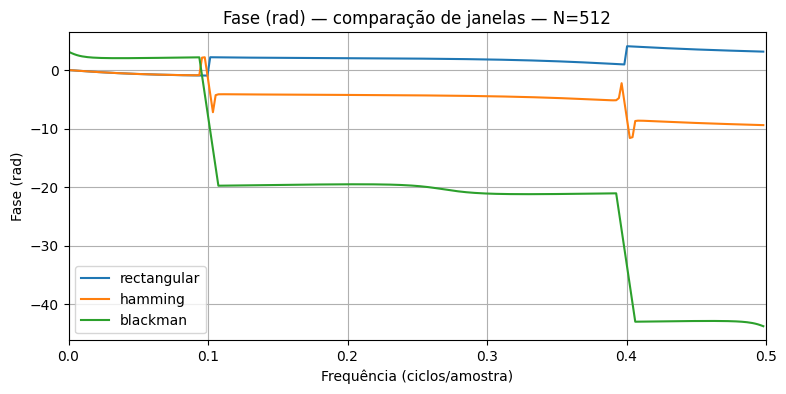

In [14]:
# ---------------------------------------------------
# 4) Loop principal: gráficos e detecção de picos
# ---------------------------------------------------

for N in N_list:
    x_seg = x[:N]   # usa os primeiros N pontos do sinal
    nfft = N

    # ---------- Gráfico de Magnitude ----------
    plt.figure(figsize=(9,4))
    plt.title(f'Magnitude (dB) — comparação de janelas — N={N}')
    plt.xlabel('Frequência (ciclos/amostra)')
    plt.ylabel('Magnitude (dB)')

    for wname, wfunc in window_funcs.items():
        win = wfunc(N)
        freqs_pos, mag, phase, Xpos = compute_fft(x_seg, win, nfft)
        plt.plot(freqs_pos, mag, label=wname)

    plt.xlim(0, 0.5)
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------- Gráfico de Fase ----------
    plt.figure(figsize=(9,4))
    plt.title(f'Fase (rad) — comparação de janelas — N={N}')
    plt.xlabel('Frequência (ciclos/amostra)')
    plt.ylabel('Fase (rad)')

    for wname, wfunc in window_funcs.items():
        win = wfunc(N)
        freqs_pos, mag, phase, Xpos = compute_fft(x_seg, win, nfft)
        plt.plot(freqs_pos, np.unwrap(phase), label=wname)

    plt.xlim(0, 0.5)
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------- Detecção automática de picos ----------
    for wname, wfunc in window_funcs.items():
        win = wfunc(N)
        freqs_pos, mag, phase, Xpos = compute_fft(x_seg, win, nfft)

        mag_lin = np.abs(Xpos)
        peaks, props = find_peaks(mag_lin, height=np.max(mag_lin)*0.05)

        peak_heights = props["peak_heights"]

        # Seleciona os dois maiores picos
        if len(peaks) == 0:
            detected = []
        else:
            top_idx = np.argsort(peak_heights)[-2:][::-1]
            detected = []
            for tidx in top_idx:
                idx = peaks[tidx]
                detected.append((freqs_pos[idx], mag[idx], phase[idx]))

        results.append({
            'N': N,
            'window': wname,
            'detected_peaks': detected
        })

In [15]:
# ---------------------------------------------------
# 5) Tabela com os picos detectados
# ---------------------------------------------------

rows = []
for r in results:
    N = r['N']
    w = r['window']
    det = r['detected_peaks']

    if len(det) == 0:
        rows.append({'N': N, 'Janela': w,
                     'Pico 1 (cic/am)': None, 'Mag1 (dB)': None,
                     'Pico 2 (cic/am)': None, 'Mag2 (dB)': None})
    elif len(det) == 1:
        f1det, mag1, ph1 = det[0]
        rows.append({'N': N, 'Janela': w,
                     'Pico 1 (cic/am)': float(f1det), 'Mag1 (dB)': float(mag1),
                     'Pico 2 (cic/am)': None, 'Mag2 (dB)': None})
    else:
        f1det, mag1, ph1 = det[0]
        f2det, mag2, ph2 = det[1]
        rows.append({'N': N, 'Janela': w,
                     'Pico 1 (cic/am)': float(f1det), 'Mag1 (dB)': float(mag1),
                     'Pico 2 (cic/am)': float(f2det), 'Mag2 (dB)': float(mag2)})

df = pd.DataFrame(rows)
df

,N,Janela,Pico 1 (cic/am),Mag1 (dB),Pico 2 (cic/am),Mag2 (dB)
0,64,rectangular,0.093750,27.878677,0.406250,22.149944
1,64,hamming,0.093750,23.566682,0.406250,17.583843
2,64,blackman,0.093750,21.751586,0.406250,15.730802
3,128,rectangular,0.101562,35.547473,0.398438,29.601813
4,128,hamming,0.101562,30.440329,0.398438,24.430600
5,128,blackman,0.101562,28.348548,0.398438,22.327957
6,512,rectangular,0.099609,47.574770,0.400391,41.565920
7,512,hamming,0.099609,42.521053,0.400391,36.502119
8,512,blackman,0.099609,40.438829,0.400391,34.418229


As simulações demonstraram como o tamanho da DFT (N) e o tipo de janela influenciam a análise espectral. Observou-se que valores pequenos de N apresentam baixa resolução, com picos largos e imprecisos, enquanto valores maiores (como N = 512) proporcionam resolução significativamente superior, permitindo identificar com precisão as frequências presentes (0,1 e 0,4 ciclos/amostra).

O leakage também se mostrou mais intenso para N pequenos e especialmente para a janela retangular, que possui lóbulos laterais elevados. As janelas Hamming e Blackman reduziram o leakage, com a Blackman apresentando a melhor supressão dos lóbulos laterais, embora com um lóbulo principal mais largo e, portanto, menor resolução.

Em conjunto, os resultados confirmam o trade-off clássico:
janelas que reduzem leakage tendem a diminuir a resolução espectral, enquanto janelas que preservam a resolução apresentam maior espalhamento de energia. Além disso, aumentar N melhora simultaneamente resolução e redução natural do leakage, aproximando o espectro da forma ideal.